<a href="https://colab.research.google.com/github/A-vidhyalakshmi/Ola-ensemble-case-study/blob/main/ola_ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OLA ENSEMBLE LEARNING BIZ CASE STUDY


Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.



### Column Profiling:

**MMMM-YY :** Reporting Date (Monthly)

**Driver_ID :** Unique id for drivers

**Age :** Age of the driver

**Gender :** Gender of the driver (Male : 0, Female: 1)

**City :** City Code of the driver

**Education_Level :** Education level (0 for 10+ ,1 for 12+ ,2 for graduate)

**Income :** Monthly average Income of the driver

**Date Of Joining :** Joining date for the driver

**LastWorkingDate :** Last date of working for the driver

**Joining Designation :** Designation of the driver at the time of joining

**Grade :** Grade of the driver at the time of reporting

**Total Business Value :** The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)

**Quarterly Rating :** Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

## PROBLEM STATEMENT:

1. To predict whether a driver will be leaving the company or not based on their attributes.

2. Reason for Drivers attrition

### ADDITIONAL VIEWS:

1. This is the classification problem for churning, we need to track the various metrics like Recall, ROC-AUC curve etc.

2. As this industry is very competitive we need to focus more on the trained feature importances.

### CONCEPTS USED:

1. Ensemble Learning- Bagging
2. Ensemble Learning- Boosting
3. KNN Imputation of Missing Values
4. Working with an imbalanced dataset

To get insights and make better business decision, we need functions and methods, so we must import Python libraries into our work notebook.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report,accuracy_score,average_precision_score
from  sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc,confusion_matrix, ConfusionMatrixDisplay


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

import time



To get the data into our work space we use the below code(to read csv files)
and saving the whole set of data into a single variable(dataframe) which makes analysis easier

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv

--2024-03-19 13:09:48--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.172.139.210, 18.172.139.46, 18.172.139.61, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.172.139.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1127673 (1.1M) [text/plain]
Saving to: ‘ola_driver_scaler.csv.2’

ola_driver_scaler.c 100%[===================>]   1.08M  --.-KB/s    in 0.06s   

2024-03-19 13:09:48 (19.4 MB/s) - ‘ola_driver_scaler.csv.2’ saved [1127673/1127673]



In [ ]:
df = pd.read_csv('ola_driver_scaler.csv')

### TO GET BASIC UNDERSTANDING OF THE DATASET


In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
df.sample(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
11065,11065,08/01/20,1652,33.0,0.0,C3,1,127193,05/01/20,NaN,3,3,275160,1
5952,5952,01/01/19,890,32.0,1.0,C5,0,43463,07/08/17,NaN,1,1,356700,2
6109,6109,10/01/20,908,47.0,0.0,C4,1,33883,21/10/18,10/10/20,1,2,348630,2
5185,5185,11/01/19,770,25.0,0.0,C26,0,18544,07/05/19,NaN,2,2,489610,3
8252,8252,09/01/20,1225,30.0,1.0,C11,1,42262,25/04/16,NaN,1,1,843140,2


In [ ]:
# TO GET NO. OF ROWS & COLUMNS:

df.shape

(19104, 14)

In [ ]:
# TO GET TOTAL ELEMENTS IN THE DATASET (i.e., the dot product of no. of rows & columns)

df.size

267456

In [ ]:
# To get index

df.index

RangeIndex(start=0, stop=19104, step=1)

In [ ]:
# TO GET THE NAMES OF THE COLUMNS

df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [ ]:
df['MMM-YY'].min(),df['MMM-YY'].max()

('01/01/19', '12/01/20')

### INFERENCE:

This dataset is for the time period of **2 years** 2019 and 2020

### MEMORY SPACE UTILIZATION

In [ ]:
# To get memory usage of each column

df.memory_usage()

Index                      128
Unnamed: 0              152832
MMM-YY                  152832
Driver_ID               152832
Age                     152832
Gender                  152832
City                    152832
Education_Level         152832
Income                  152832
Dateofjoining           152832
LastWorkingDate         152832
Joining Designation     152832
Grade                   152832
Total Business Value    152832
Quarterly Rating        152832
dtype: int64

In [ ]:
# TO GET THE TOTAL INFORMATION ABOUT THE DATASET.
# info function let us know the columns with their data types and no. of non-null values & the total memory usage


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
int_col = df.select_dtypes(include='int64').columns
for cols in int_col:
  df[cols] = df[cols].astype('int32')

In [ ]:
float_col = df.select_dtypes(include='float64').columns
for cols in float_col:
  df[cols] = df[cols].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int32  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int32  
 3   Age                   19043 non-null  float32
 4   Gender                19052 non-null  float32
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int32  
 7   Income                19104 non-null  int32  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int32  
 11  Grade                 19104 non-null  int32  
 12  Total Business Value  19104 non-null  int32  
 13  Quarterly Rating      19104 non-null  int32  
dtypes: float32(2), int32(8), object(4)
memory usage: 1.3+ MB


### DROPPING UNWANTED COLUMN

Unnamed: 0 is the column which specifies just the serial number. So it can be dropped

In [ ]:
df.drop('Unnamed: 0', axis =1, inplace=True)

### ANALYSING THE DATASET

In [ ]:
df[df['Driver_ID']==1987]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
13338,01/01/19,1987,24.0,0.0,C4,2,67394,21/10/18,NaN,2,2,1378810,2
13339,02/01/19,1987,25.0,0.0,C4,2,67394,21/10/18,NaN,2,2,533500,2
13340,03/01/19,1987,25.0,0.0,C4,2,67394,21/10/18,NaN,2,2,102230,2
13341,04/01/19,1987,25.0,0.0,C4,2,67394,21/10/18,NaN,2,2,0,2
13342,05/01/19,1987,25.0,0.0,C4,2,67394,21/10/18,NaN,2,2,582860,2
13343,06/01/19,1987,25.0,0.0,C4,2,67394,21/10/18,NaN,2,2,145510,2
13344,07/01/19,1987,25.0,0.0,C4,2,67394,21/10/18,NaN,2,2,0,1
13345,08/01/19,1987,25.0,0.0,C4,2,67394,21/10/18,NaN,2,2,291010,1
13346,09/01/19,1987,25.0,0.0,C4,2,67394,21/10/18,NaN,2,2,0,1
13347,10/01/19,1987,25.0,0.0,C4,2,67394,21/10/18,NaN,2,2,0,1


In [ ]:
agg_df = df.groupby('Driver_ID').agg({'MMM-YY':'count',
                                      'Age':'max',
                                      'Gender':'first',
                                      'City':'first',
                                      'Education_Level':'first',
                                      'Income':'first',
                                      'Dateofjoining':'first',
                                      'LastWorkingDate':'last',
                                      'Joining Designation':'first',
                                      'Grade':'first',
                                      'Total Business Value':'mean',
                                      'Quarterly Rating':'mean'}).reset_index()

agg_df = agg_df.rename(columns = {'MMM-YY':'no_of_records'})
agg_df['Total Business Value'] = agg_df['Total Business Value'].round(0)
agg_df['Quarterly Rating'] = agg_df['Quarterly Rating'].round(0)
agg_df['Dateofjoining'] = pd.to_datetime(agg_df['Dateofjoining'])

agg_df.head()

,Driver_ID,no_of_records,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,3,28.0,0.0,C23,2,57387,2018-12-24,03/11/19,1,1,571860.0,2.0
1,2,2,31.0,0.0,C7,2,67016,2020-11-06,None,2,2,0.0,1.0
2,4,5,43.0,0.0,C13,2,65603,2019-12-07,27/04/20,2,2,70000.0,1.0
3,5,3,29.0,0.0,C9,0,46368,2019-01-09,03/07/19,1,1,40120.0,1.0
4,6,5,31.0,1.0,C11,1,78728,2020-07-31,None,3,3,253000.0,2.0


## CONVERSION OF DATA TYPES

### CONVERTING INTO CATEGORICAL:


In [ ]:
cat_cols = ['Gender','Education_Level','Joining Designation','Grade','Quarterly Rating']


for col in cat_cols:
  df[col] = df[col].astype('category')


### CONVERTING TO DATETIME

In [ ]:
cols = ['MMM-YY','Dateofjoining']

for col in cols:
  df[col] = pd.to_datetime(df[col])

### MISSING VALUE DETECTION

In [ ]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

### INFERENCE:

There are few missing values in columns like Age, Gender, Last Working Date.

Handling the missing values has to be done after analysing/ understanding the column distribution and its property.

The Null Values in Last Working date indicates that the driver is still working in Ola

### TREATING MISSING VALUES - KNN IMPUTER

In [ ]:
imputer = KNNImputer(n_neighbors=5)
age = np.array(df['Age']).reshape(-1,1)

imputer.fit(age)
age_imputed = imputer.transform(age)

df['Age'] = age_imputed.round(0)

In [ ]:
imputer = KNNImputer(n_neighbors=5)
gender = np.array(df['Gender']).reshape(-1,1)

imputer.fit(gender)
gender_imputed = imputer.transform(gender)

df['Gender'] = gender_imputed.round(0)

In [ ]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

### CHECK FOR DUPLICATES


In [ ]:
duplicate_rows = len(df[df.duplicated()])
duplicate_rows

0

### INFERENCE:
There are **No duplicates**

## FEATURE ENGINEERING

### Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1


In [ ]:
def qua_rate_inc(y):

  if len(y) >= 2:
    for i in range(len(y)):
      if y[-1] > y[-2]:
        return 1

      else:
        return 0

  else:
    return 0

In [ ]:
Quarterly_rating_increased = df.groupby('Driver_ID')['Quarterly Rating'].unique().apply(qua_rate_inc)

agg_df = pd.merge(right = Quarterly_rating_increased,
        left = agg_df,
         on = "Driver_ID",
         how="outer")


agg_df = agg_df.rename(columns = {'Quarterly Rating_x': 'Quarterly Rating'})
agg_df = agg_df.rename(columns = {'Quarterly Rating_y':'Quarterly Rating_increased'})
agg_df.head()

,Driver_ID,no_of_records,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly Rating_increased
0,1,3,28.0,0.0,C23,2,57387,2018-12-24,03/11/19,1,1,571860.0,2.0,0
1,2,2,31.0,0.0,C7,2,67016,2020-11-06,None,2,2,0.0,1.0,0
2,4,5,43.0,0.0,C13,2,65603,2019-12-07,27/04/20,2,2,70000.0,1.0,0
3,5,3,29.0,0.0,C9,0,46368,2019-01-09,03/07/19,1,1,40120.0,1.0,0
4,6,5,31.0,1.0,C11,1,78728,2020-07-31,None,3,3,253000.0,2.0,1


### Target variable creation:
Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1



### NOTE:

The null values in last working date column means the driver left the company. So this is the TARGET VARIABLE.

And we can change it into categorical column( Null values are replaced with 0 and Non Null values are replaced with 1)

This shows,

  non-churn = 0
  
  churn = 1

In [ ]:
df['LastWorkingDate'] = df['LastWorkingDate'].fillna(0)


df['LastWorkingDate'] = df['LastWorkingDate'].map(lambda x:1 if x!=0 else 0)
df['LastWorkingDate'].astype('category')




0        0
1        0
2        1
3        0
4        0
        ..
19099    0
19100    0
19101    0
19102    0
19103    0
Name: LastWorkingDate, Length: 19104, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
df['LastWorkingDate'].value_counts(normalize=True)

0    0.91541
1    0.08459
Name: LastWorkingDate, dtype: float64

In [ ]:
agg_df['LastWorkingDate'] = agg_df['LastWorkingDate'].fillna(0)


agg_df['LastWorkingDate'] = agg_df['LastWorkingDate'].map(lambda x:1 if x!=0 else 0)
agg_df['LastWorkingDate'].astype('category')



agg_df.isna().sum()

Driver_ID                     0
no_of_records                 0
Age                           0
Gender                        0
City                          0
Education_Level               0
Income                        0
Dateofjoining                 0
LastWorkingDate               0
Joining Designation           0
Grade                         0
Total Business Value          0
Quarterly Rating              0
Quarterly Rating_increased    0
dtype: int64

In [ ]:
agg_df['LastWorkingDate'].value_counts(normalize=True)

1    0.678706
0    0.321294
Name: LastWorkingDate, dtype: float64

### INFERENCE:

Around 68% drivers still work in ola

whereas 32% drivers left the company

### Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1



In [ ]:
def income_inc(y):
  if len(y) >= 2:
    for i in range(len(y)):
      if y[-1] > y[-2]:
        return 1

      else:
        return 0

  else:
    return 0


In [ ]:
income_increased = df.groupby('Driver_ID')['Income'].unique().apply(income_inc)

agg_df = pd.merge(right = income_increased,
        left = agg_df,
         on = "Driver_ID",
         how="outer")


agg_df = agg_df.rename(columns = {'Income_x':'Income'})
agg_df = agg_df.rename(columns = {'Income_y':'Income_increased'})
agg_df.head()

,Driver_ID,no_of_records,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly Rating_increased,Income_increased
0,1,3,28.0,0.0,C23,2,57387,2018-12-24,1,1,1,571860.0,2.0,0,0
1,2,2,31.0,0.0,C7,2,67016,2020-11-06,0,2,2,0.0,1.0,0,0
2,4,5,43.0,0.0,C13,2,65603,2019-12-07,1,2,2,70000.0,1.0,0,0
3,5,3,29.0,0.0,C9,0,46368,2019-01-09,1,1,1,40120.0,1.0,0,0
4,6,5,31.0,1.0,C11,1,78728,2020-07-31,0,3,3,253000.0,2.0,1,0


In [ ]:
max(df['MMM-YY'])

Timestamp('2020-12-01 00:00:00')

In [ ]:
agg_df['tenure'] = max(df['MMM-YY'])- agg_df['Dateofjoining']

agg_df['tenure']

0       708 days
1        25 days
2       360 days
3       692 days
4       123 days
          ...   
2376   1874 days
2377     95 days
2378    854 days
2379    864 days
2380    176 days
Name: tenure, Length: 2381, dtype: timedelta64[ns]

In [ ]:
agg_df['tenure'] = agg_df['tenure'].dt.days

In [ ]:
agg_df.drop(['Driver_ID','Dateofjoining'], axis=1, inplace=True)

## NON GRAPHICAL ANALYSIS

In [ ]:
agg_df['Gender'].value_counts()


0.0    1404
1.0     977
Name: Gender, dtype: int64

In [ ]:
agg_df['City'].value_counts()


C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64

In [ ]:
agg_df['Education_Level'].value_counts()


2    802
1    795
0    784
Name: Education_Level, dtype: int64

In [ ]:
agg_df['Joining Designation'].value_counts()


1    1026
2     815
3     493
4      36
5      11
Name: Joining Designation, dtype: int64

In [ ]:
agg_df['Grade'].value_counts()


2    866
1    751
3    611
4    132
5     21
Name: Grade, dtype: int64

In [ ]:
df['Total Business Value'].value_counts()


0         6499
200000     288
250000     148
500000     131
300000     107
          ... 
130520       1
275330       1
820160       1
203040       1
448370       1
Name: Total Business Value, Length: 10181, dtype: int64

In [ ]:
agg_df['Quarterly Rating'].value_counts()


1.0    1353
2.0     725
3.0     269
4.0      34
Name: Quarterly Rating, dtype: int64

In [ ]:
agg_df['LastWorkingDate'].value_counts()


1    1616
0     765
Name: LastWorkingDate, dtype: int64

In [ ]:
df['Driver_ID'].nunique()

2381

### INFERENCE:

There are **2381** drivers employed in the company(this includes both who have left and those who are still working)

Out of 2381, **1616** employee **left** the company

### STATISTICAL SUMMERY


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19104.0,34.669495,6.247941e+00,21.0,30.0,34.0,39.0,58.0
Gender,19104.0,0.417609,4.931779e-01,0.0,0.0,0.0,1.0,1.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
LastWorkingDate,19104.0,0.084590,2.782773e-01,0.0,0.0,0.0,0.0,1.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0


In [ ]:
df.describe(include='category').T

,count,unique,top,freq
Education_Level,19104,3,1,6864
Joining Designation,19104,5,1,9831
Grade,19104,5,2,6627
Quarterly Rating,19104,4,1,7679


In [ ]:
df.describe(include=object).T


,count,unique,top,freq
City,19104,29,C20,1008


In [ ]:
agg_df.describe().T


,count,mean,std,min,25%,50%,75%,max
no_of_records,2381.0,8.023520,6.783590,1.0,3.0,5.0,10.0,24.0
Age,2381.0,33.663166,5.983376,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,0.410332,0.491997,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560,0.816290,0.0,0.0,1.0,2.0,2.0
Income,2381.0,59209.060899,28275.899087,10747.0,39104.0,55276.0,75765.0,188418.0
LastWorkingDate,2381.0,0.678706,0.467071,0.0,0.0,1.0,1.0,1.0
Joining Designation,2381.0,1.820244,0.841433,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.078538,0.931321,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,312085.367073,449570.498744,-197933.0,0.0,150624.0,429499.0,3972128.0
Quarterly Rating,2381.0,1.573289,0.745987,1.0,1.0,1.0,2.0,4.0


In [ ]:
agg_df.describe(include=object).T


,count,unique,top,freq
City,2381,29,C20,152


In [ ]:
agg_df['LastWorkingDate'].value_counts(normalize=True)

1    0.678706
0    0.321294
Name: LastWorkingDate, dtype: float64

### INFERENCE:

1. Max age of drivers is 58 years.

2. Maximum income is **188418**

3. Maximum Business value is **33747720**

4. Most of the drivers are from city **C20**

# EXPLORATORY DATA ANALYSIS


## UNIVARIATE ANALYSIS


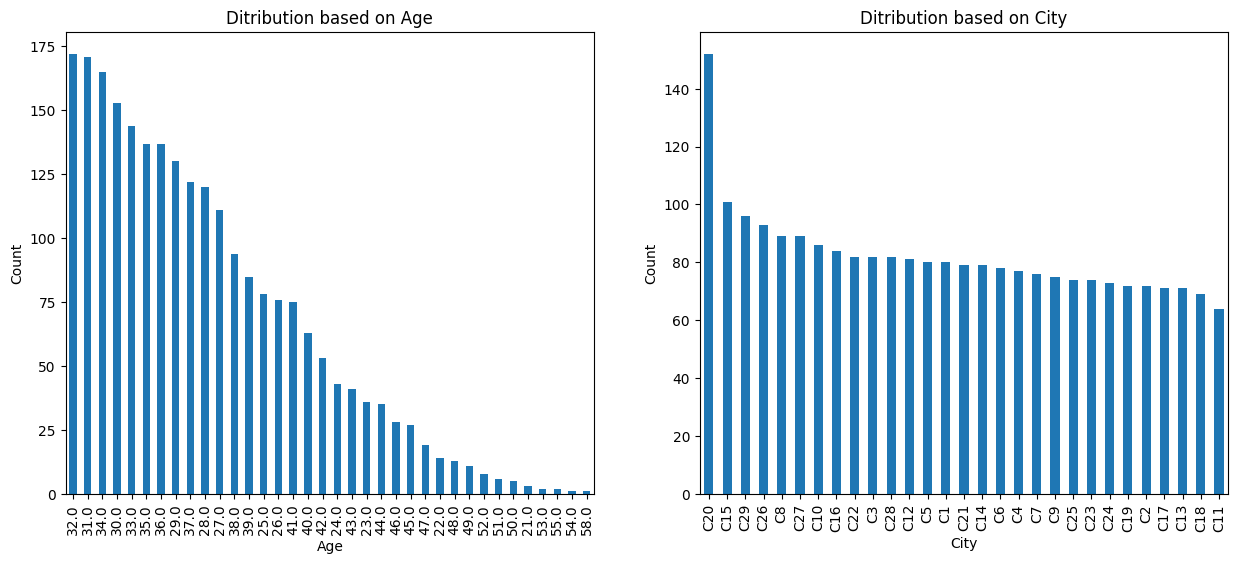

In [ ]:
cols = ['Age','City']

plt.figure(figsize=(15,6))
i=1
for col in cols:
  plt.subplot(1,2,i)
  agg_df[col].value_counts().plot(kind='bar')
  plt.title(f'Ditribution based on {col}')
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  i+=1
plt.show()


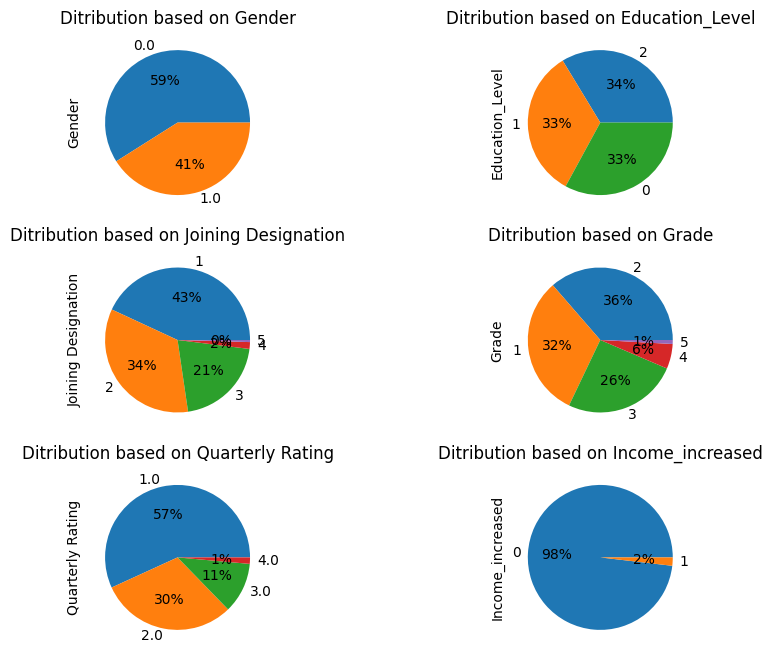

In [ ]:
cols = ['Gender','Education_Level','Joining Designation','Grade','Quarterly Rating','Income_increased']

plt.figure(figsize=(10,8))
i=1
for col in cols:
  plt.subplot(3,2,i)
  agg_df[col].value_counts().plot(kind='pie', autopct = '%.0f%%')
  plt.title(f'Ditribution based on {col}')
  i+=1
plt.show()


<ipython-input-45-221f8806eb68>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=agg_df.Age,palette='viridis',width=0.8)
<ipython-input-45-221f8806eb68>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=a,palette='viridis')


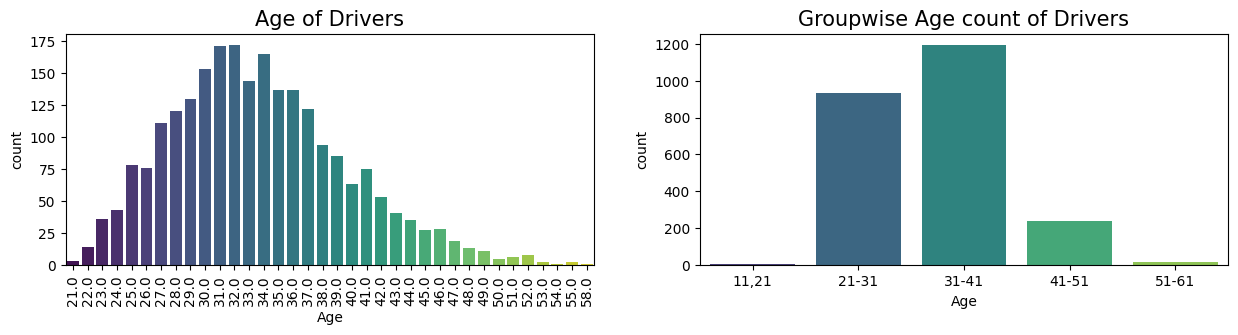

In [ ]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(121)
sns.countplot(x=agg_df.Age,palette='viridis',width=0.8)
plt.title('Age of Drivers', fontsize=15)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
a = pd.cut(agg_df.Age,bins=[11,21,31,41,51,61],labels=['11,21','21-31','31-41','41-51','51-61'])
sns.countplot(x=a,palette='viridis')
plt.title('Groupwise Age count of Drivers', fontsize=15)

plt.show()

### INFERENCE:

1. Most drivers are of the age **32 years** and only one driver is 58 years old.
Also most drivers fall under the age group of **31 to 41 years**

2. Most drivers are from city **C20** whereas least are from C11

3. There are **59% male** and **41% female** drivers

4. The distribution of drivers on the basis of education level is almost the same for all categories

5. Majority of the drivers join the company in **designation 1**

6. Majority drivers fall under **grade 2** with the minority being grade 5

7. Most drivers had **no raise** in their Quarterly **rating** which is poor

8. **98%** of the drivers **didnt** get any **hike** in their salary for 2 years


### BIVARIATE ANALYSIS

In [ ]:
agg_df['LastWorkingDate'] = agg_df['LastWorkingDate'].map(lambda x:'churn' if x!=0 else 'non-churn')
agg_df['Gender'] = agg_df['Gender'].map(lambda x:'Male' if x==0 else 'Female')



In [ ]:
agg_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

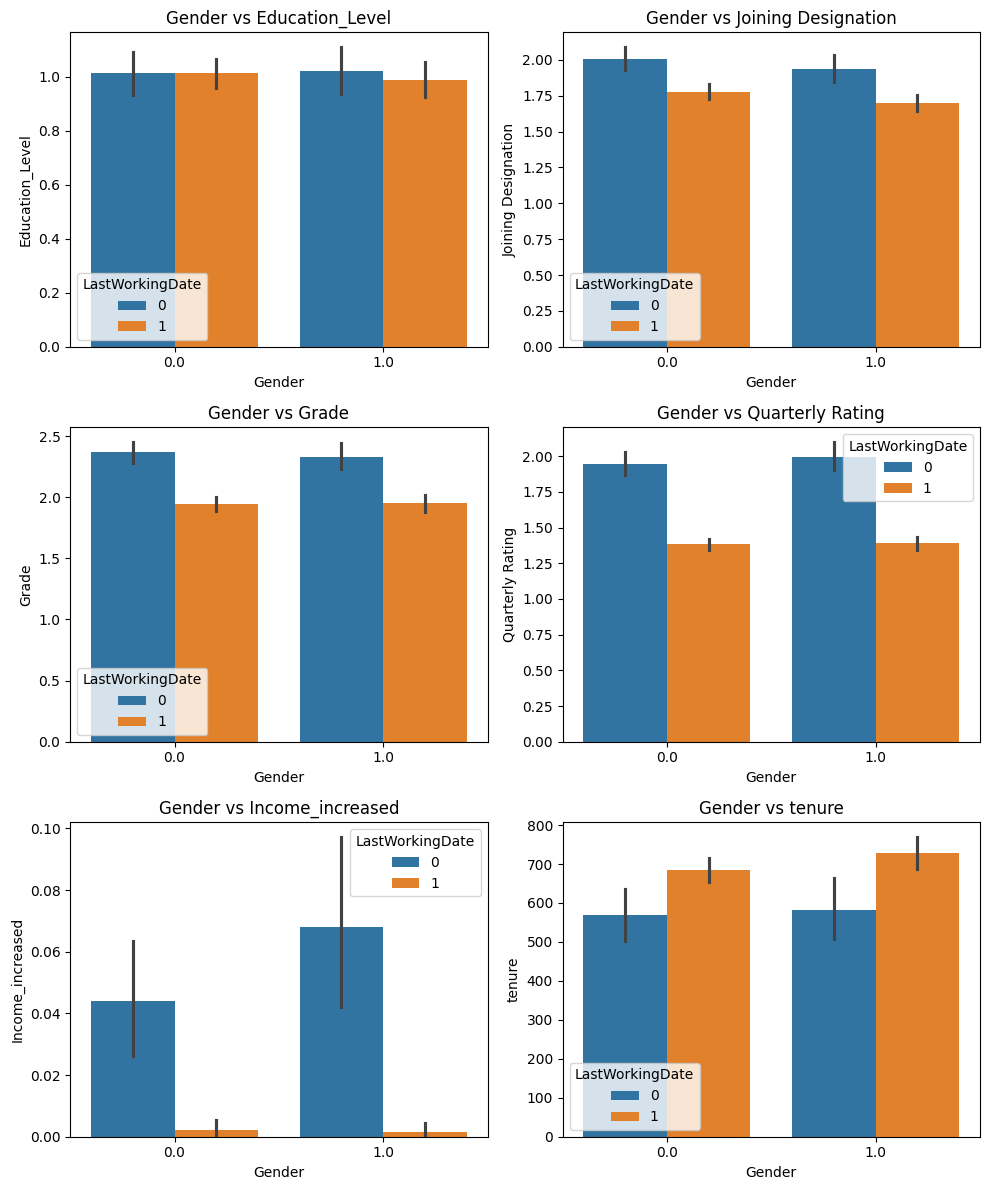

In [ ]:
cols = ['Education_Level','Joining Designation','Grade','Quarterly Rating','Income_increased','tenure']


plt.figure(figsize=(10,12))
i=1
for col in cols:
  plt.subplot(3,2,i)
  sns.barplot(data=agg_df,x='Gender',y=col,hue='LastWorkingDate')
  plt.title(f'Gender vs {col}')
  i+=1
plt.tight_layout()
plt.show()





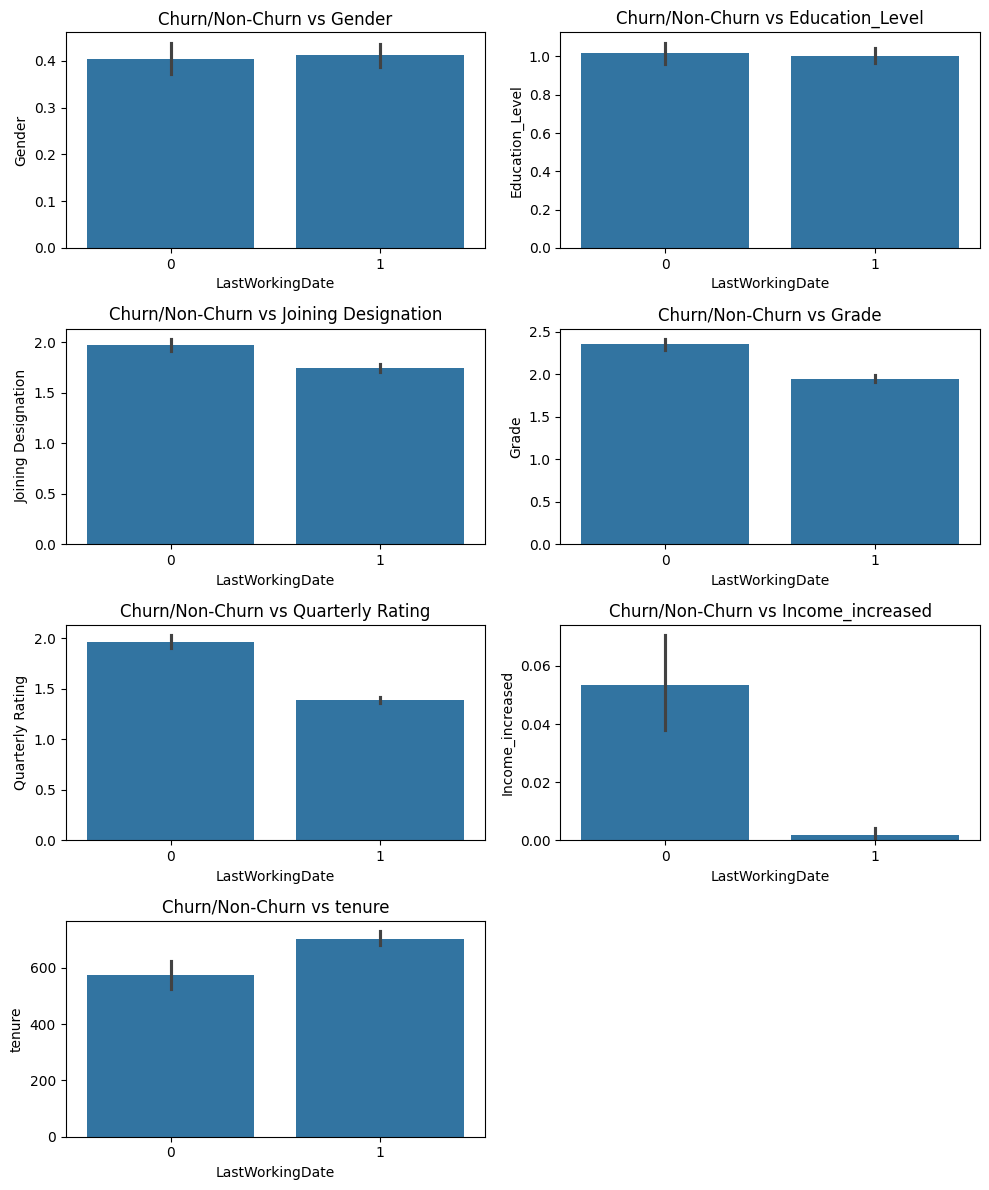

In [ ]:
cols = ['Gender','Education_Level','Joining Designation','Grade','Quarterly Rating','Income_increased','tenure']


plt.figure(figsize=(10,12))
i=1
for col in cols:
  plt.subplot(4,2,i)
  sns.barplot(data=agg_df,y=col,x='LastWorkingDate')
  plt.title(f'Churn/Non-Churn vs {col}')
  i+=1
plt.tight_layout()
plt.show()


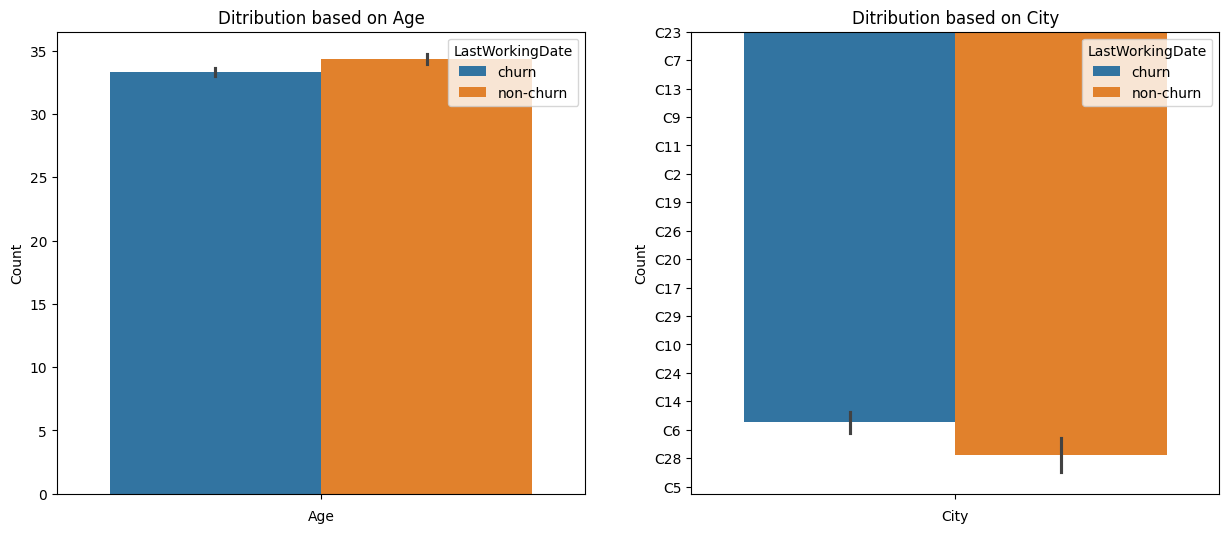

In [ ]:
cols = ['Age','City']

plt.figure(figsize=(15,6))
i=1
for col in cols:
  plt.subplot(1,2,i)
  sns.barplot(data = agg_df, y= col,hue='LastWorkingDate')
  plt.title(f'Ditribution based on {col}')
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  i+=1
plt.show()



### INFERENCE:

1. The columns Gender and Education level has no effect on the employee churn rate

2. Joining Designation, Grade, Age, City - columns has a little impact on the churn rate

3. Churn rate is **greatly influenced** by **Quarterly rating improvement**, **increased income** and **tenure**

### MULTIVARIATE ANALYSIS

In [ ]:
agg_df['LastWorkingDate'] = agg_df['LastWorkingDate'].map(lambda x:1 if x=='churn' else 0)
agg_df['Gender'] = agg_df['Gender'].map(lambda x:0 if x=='Male' else 1)


In [ ]:
agg_df.corr()

<ipython-input-83-a76563a670bb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  agg_df.corr()


,no_of_records,Age,Gender,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly Rating_increased,Income_increased,tenure
no_of_records,1.000000,0.301765,0.020397,0.020455,0.266852,-0.345718,-0.182404,0.209868,0.683212,0.678093,0.371032,0.292881,0.575382
Age,0.301765,1.000000,0.030985,-0.007823,0.207272,-0.078883,0.081523,0.239624,0.241658,0.214510,0.067108,0.108337,0.299905
Gender,0.020397,0.030985,1.000000,-0.008773,0.006852,0.008966,-0.046056,-0.006173,0.009939,0.010185,0.027171,0.025013,0.028638
Education_Level,0.020455,-0.007823,-0.008773,1.000000,0.140903,-0.007953,0.003203,-0.014046,0.008085,0.034970,0.010877,-0.020377,-0.004214
Income,0.266852,0.207272,0.006852,0.140903,1.000000,-0.197002,0.484837,0.738378,0.377476,0.174554,0.122459,0.056327,0.222691
LastWorkingDate,-0.345718,-0.078883,0.008966,-0.007953,-0.197002,1.000000,-0.127773,-0.202764,-0.329639,-0.361086,-0.271655,-0.179394,0.101542
Joining Designation,-0.182404,0.081523,-0.046056,0.003203,0.484837,-0.127773,1.000000,0.732204,-0.078550,-0.177139,0.042741,-0.081889,-0.310529
Grade,0.209868,0.239624,-0.006173,-0.014046,0.738378,-0.202764,0.732204,1.000000,0.323516,0.058539,0.125827,0.005172,0.194292
Total Business Value,0.683212,0.241658,0.009939,0.008085,0.377476,-0.329639,-0.078550,0.323516,1.000000,0.777712,0.249739,0.360800,0.458346
Quarterly Rating,0.678093,0.214510,0.010185,0.034970,0.174554,-0.361086,-0.177139,0.058539,0.777712,1.000000,0.353266,0.321015,0.350520


<ipython-input-84-776e0225671d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(agg_df.corr(),annot=True, cmap="RdYlGn",  annot_kws={"size":10})


<Axes: >

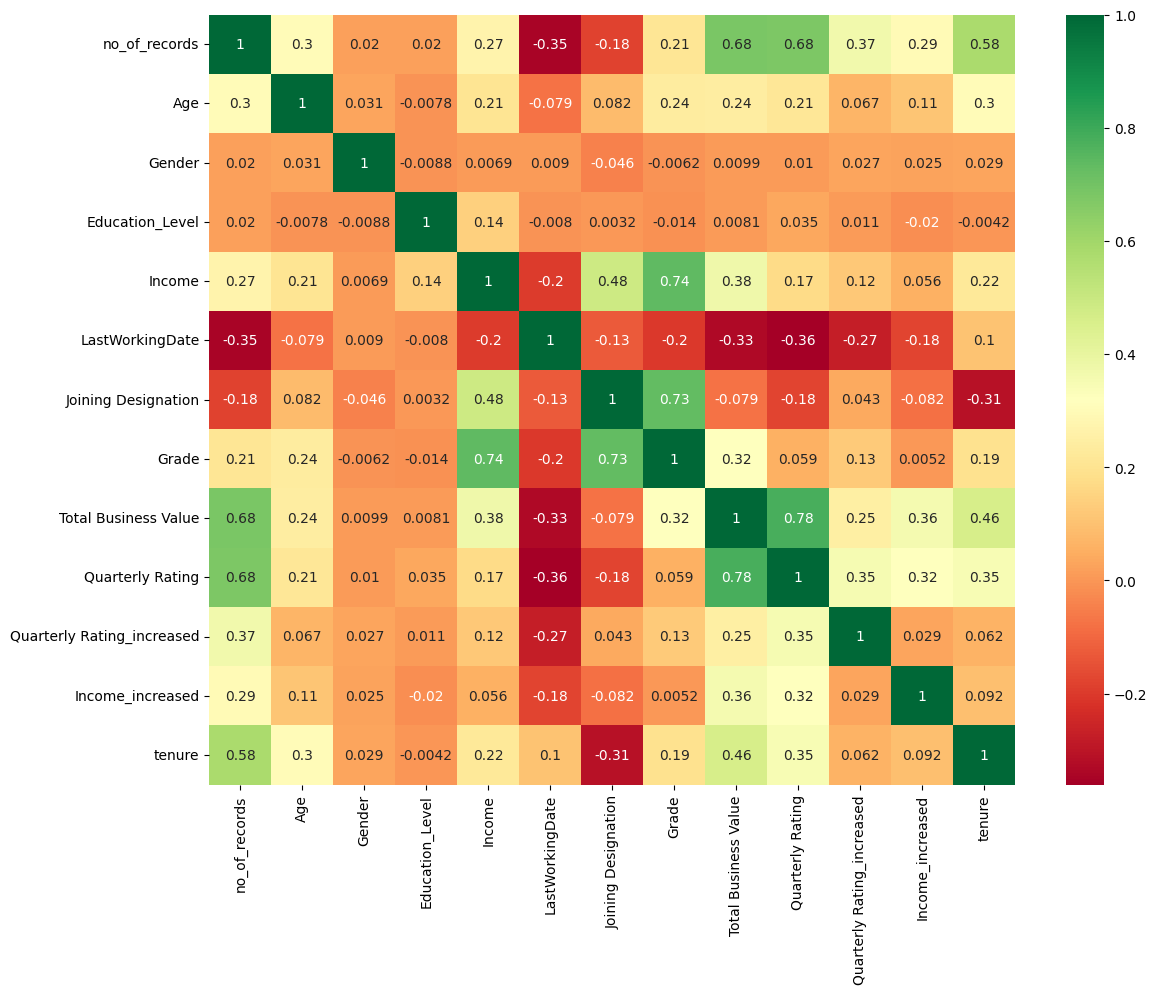

In [ ]:
plt.figure(figsize=(13, 10))

sns.heatmap(agg_df.corr(),annot=True, cmap="RdYlGn",  annot_kws={"size":10})


###  INFERENCE:

1. The columns **Joining designation** and **Grade** are highly correlated(**73%**).

2. So, there may exists **multicolinearity** problem

3. Total Business value and Increased Income are fairly correlated(36%)

### BOXPLOT - OUTLIER DETECTION

In [ ]:
num_cols = ['Age', 'Education_Level','Joining Designation', 'Grade', 'Total Business Value']

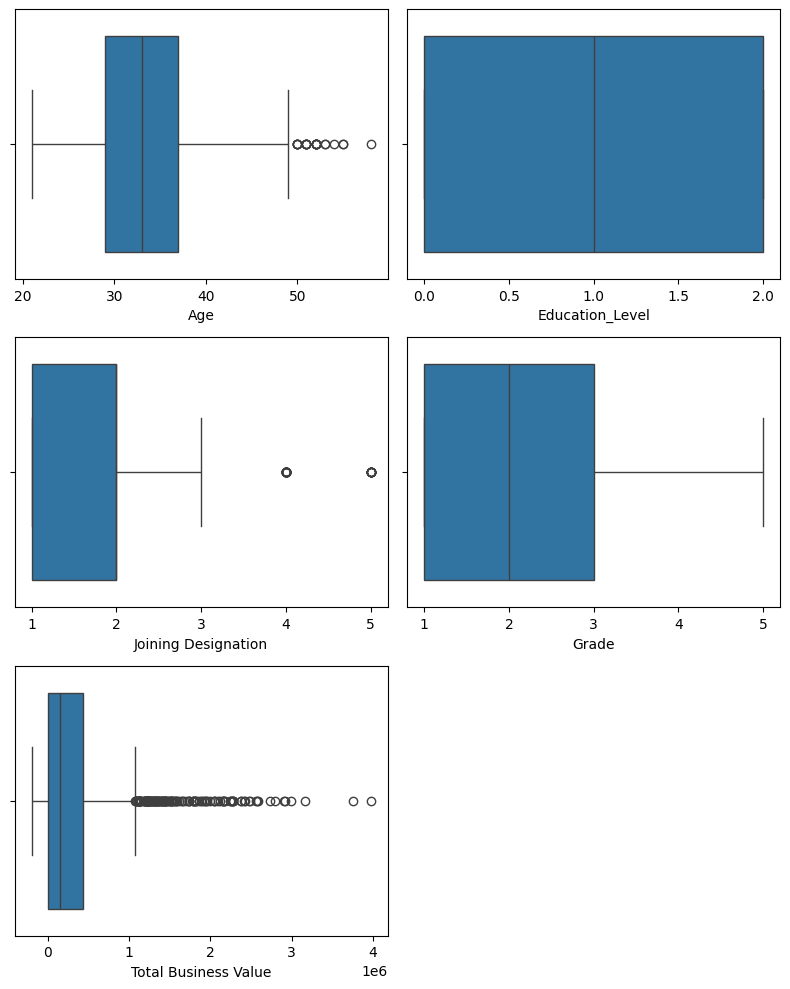

In [ ]:
plt.figure(figsize=(8,10))

for i in range(len(num_cols)):
  plt.subplot(3,2,i+1)
  sns.boxplot(x=agg_df[num_cols[i]])
plt.tight_layout()
plt.show()



### INFERENCE:

1. The outliers in the Age column indicates that there are drivers who work even after their 50s

2. Joining designation outlier shows that senior experienced drivers are joined in higher designation

3. The total business value column shows a lot of outliers. This is because of the negative values which has bad effect on model building. so it has to be treated

### TREATING OUTLIERS

In [ ]:
(agg_df['Total Business Value']<1).sum()

729

In [ ]:
agg_df['Total Business Value'] = np.sqrt(agg_df['Total Business Value'])

agg_df['Total Business Value'] = agg_df['Total Business Value'].fillna(0)


agg_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,no_of_records,Age,Gender,City,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly Rating_increased,Income_increased,tenure
0,3,28.0,0.0,C23,2,57387,1,1,1,756.214255,2.0,0,0,708
1,2,31.0,0.0,C7,2,67016,0,2,2,0.000000,1.0,0,0,25
2,5,43.0,0.0,C13,2,65603,1,2,2,264.575131,1.0,0,0,360
3,3,29.0,0.0,C9,0,46368,1,1,1,200.299775,1.0,0,0,692
4,5,31.0,1.0,C11,1,78728,0,3,3,502.991054,2.0,1,0,123


In [ ]:
agg_df.isna().sum()

no_of_records                 0
Age                           0
Gender                        0
City                          0
Education_Level               0
Income                        0
LastWorkingDate               0
Joining Designation           0
Grade                         0
Total Business Value          0
Quarterly Rating              0
Quarterly Rating_increased    0
Income_increased              0
tenure                        0
dtype: int64

## ONE HOT ENCODING:

The only categorical value is in city column and that has to be encoded with ine hot encoding technique

In [ ]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_records               2381 non-null   int64  
 1   Age                         2381 non-null   float32
 2   Gender                      2381 non-null   int64  
 3   City                        2381 non-null   object 
 4   Education_Level             2381 non-null   int32  
 5   Income                      2381 non-null   int32  
 6   LastWorkingDate             2381 non-null   int64  
 7   Joining Designation         2381 non-null   int32  
 8   Grade                       2381 non-null   int32  
 9   Total Business Value        2381 non-null   float64
 10  Quarterly Rating            2381 non-null   float64
 11  Quarterly Rating_increased  2381 non-null   int64  
 12  Income_increased            2381 non-null   int64  
 13  tenure                      2381 

In [ ]:
#agg_df['City'] = agg_df['City'].apply(lambda x:pd.Series(x[1:]))

In [ ]:

encoder = OneHotEncoder(sparse=False)

one_hot_encoded = pd.get_dummies(agg_df['City'])
agg_df_encoded = pd.concat([agg_df,one_hot_encoded],axis=1)

In [ ]:
agg_df_encoded.drop('City',axis=1,inplace=True)
#agg_df['joining_year'] = agg_df['Dateofjoining'].dt.year
#agg_df_encoded.drop('Dateofjoining',axis=1,inplace=True)


In [ ]:
agg_df_encoded.sample()

,no_of_records,Age,Gender,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,...,C27,C28,C29,C3,C4,C5,C6,C7,C8,C9
1233,6,30.0,1.0,1,33246,1,2,2,526.412386,2.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
agg_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   no_of_records               2381 non-null   int64  
 1   Age                         2381 non-null   float32
 2   Gender                      2381 non-null   int64  
 3   Education_Level             2381 non-null   int32  
 4   Income                      2381 non-null   int32  
 5   LastWorkingDate             2381 non-null   int64  
 6   Joining Designation         2381 non-null   int32  
 7   Grade                       2381 non-null   int32  
 8   Total Business Value        2381 non-null   float64
 9   Quarterly Rating            2381 non-null   float64
 10  Quarterly Rating_increased  2381 non-null   int64  
 11  Income_increased            2381 non-null   int64  
 12  tenure                      2381 non-null   int64  
 13  C1                          2381 

## PRE-PREPARING DATA

### SPLITTING TRAIN TEST DATA

In [ ]:
x = agg_df_encoded.drop('LastWorkingDate',axis=1)
y = agg_df_encoded['LastWorkingDate']


print('X-Shape : ',x.shape)
print('Y-Shape : ',y.shape)

X-Shape :  (2381, 41)
Y-Shape :  (2381,)


In [ ]:
x_tv,x_test,y_tv,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_tv,y_tv,test_size=0.25,random_state=42)


print('Shape of x_train, y_train : ', x_train.shape ,y_train.shape)
print('Shape of x_val, y_val : ', x_val.shape ,y_val.shape)
print('Shape of x_test, y_test : ', x_test.shape ,y_test.shape)




Shape of x_train, y_train :  (1428, 41) (1428,)
Shape of x_val, y_val :  (476, 41) (476,)
Shape of x_test, y_test :  (477, 41) (477,)


### STANDARDISATION

In [ ]:
scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

x_val_scaled = pd.DataFrame(scaler.transform(x_val),columns = x_val.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)


### SMOTE


In [ ]:
y_train.value_counts()


1    955
0    473
Name: LastWorkingDate, dtype: int64

#### NEED FOR SMOTE:

By observing the data distribution in each class of y_train we can clearly say that there is **IMBALANCE**.

Therefore, to handle imbalanced data we use **Synthetically Minority Over-sampling Technique** to synthetically generate the minority class points so that the data would be balanced


In [ ]:
sm=SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(x_train_scaled,y_train)

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_sm == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_sm == 0)}")


Before OverSampling, count of label 1: 955
Before OverSampling, count of label 0: 473
After OverSampling, count of label 1: 955
After OverSampling, count of label 0: 955


# MODEL BUILDING

## BAGGING ENSEMBLE - RANDOM FOREST

### HYPER PARAMETER TUNING USING GRIDSEARCH

In [ ]:
params = {
          'n_estimators' : [50,100,200],
          'max_depth' : [5,7,10],
          'max_features' : [7,8,10]
         }

start_time = time.time()

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

grid.fit(x_sm,y_sm)


print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

elapsed_time = time.time() - start_time
print("\n Elapsed Time: ", elapsed_time)


Best params:  {'max_depth': 10, 'max_features': 10, 'n_estimators': 100}
Best score:  0.9314207056794658

 Elapsed Time:  25.381301641464233


In [ ]:
rf_clf = RandomForestClassifier(random_state=7, bootstrap=True, criterion='gini',
                              max_depth=10, max_features=10, n_estimators=50)


cv_acc_results = cross_validate(rf_clf, x_sm, y_sm, cv=10, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n\
Train: {cv_acc_results['train_score'].mean()*100:.2f}\n\
Validation: {cv_acc_results['test_score'].mean()*100:.2f}")

K-Fold Accuracy Mean: 
Train: 99.18
Validation: 92.88


In [ ]:
rf_clf.fit(x_sm,y_sm)

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=50,
                       random_state=7)

In [ ]:
rf_clf.score(x_sm,y_sm)

0.9905759162303664

In [ ]:
rf_clf.score(x_val_scaled,y_val)

0.8907563025210085

### CLASSIFICATION METRICS


In [ ]:
y_val_pred = rf_clf.predict(x_val_scaled)
print('VALIDATION DATA:')
print('Precision Score:',precision_score(y_val,y_val_pred).round(2))
print('Recall Score:',recall_score(y_val,y_val_pred).round(2))
print('F1 Score:',f1_score(y_val,y_val_pred).round(2))



VALIDATION DATA:
Precision Score: 0.94
Recall Score: 0.9
F1 Score: 0.92


In [ ]:
print(classification_report(y_val,y_val_pred))


              precision    recall  f1-score   support

           0       0.79      0.86      0.82       142
           1       0.94      0.90      0.92       334

    accuracy                           0.89       476
   macro avg       0.87      0.88      0.87       476
weighted avg       0.89      0.89      0.89       476



### CONFUSION MATRIX


In [ ]:

cm = confusion_matrix(y_val, y_val_pred)

cm

array([[122,  20],
       [ 32, 302]])

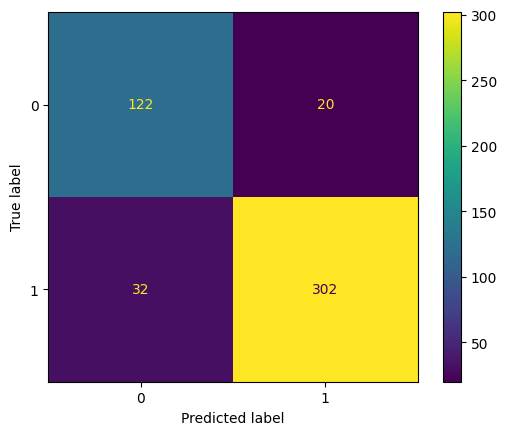

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_).plot()


### MULTI-COLINEARITY CHECK USING VIF


Dropping the columns whose vif is greater than 5

In [ ]:
def calc_vif(X):
  vif = pd.DataFrame()
  vif['features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]   # i represents each col
  vif['VIF'] = round(vif['VIF'],2)
  vif = vif.sort_values(by='VIF',ascending=False)
  return vif

In [ ]:
x_t = pd.DataFrame(x_sm)
x_val_t = pd.DataFrame(x_val_scaled)
x_test_t = pd.DataFrame(x_test_scaled)


calc_vif(x_t)

,features,VIF
7,Total Business Value,6.30
6,Grade,6.06
8,Quarterly Rating,4.74
5,Joining Designation,4.71
0,no_of_records,3.72
11,tenure,2.84
4,Income,2.67
24,C20,1.60
39,C8,1.52
33,C29,1.49


In [ ]:
x_t = x_t.drop('Total Business Value',axis=1)
x_val_t = x_val_t.drop('Total Business Value',axis=1)
x_test_t = x_test_t.drop('Total Business Value',axis=1)

calc_vif(x_t)

,features,VIF
6,Grade,5.83
5,Joining Designation,4.67
0,no_of_records,3.49
10,tenure,2.78
4,Income,2.63
7,Quarterly Rating,2.29
23,C20,1.60
38,C8,1.52
14,C12,1.49
32,C29,1.48


In [ ]:
x_t = x_t.drop('Grade',axis=1)
x_val_t = x_val_t.drop('Grade',axis=1)
x_test_t = x_test_t.drop('Grade',axis=1)

calc_vif(x_t)

,features,VIF
0,no_of_records,3.40
9,tenure,2.27
6,Quarterly Rating,2.27
5,Joining Designation,2.00
4,Income,1.96
22,C20,1.55
37,C8,1.49
13,C12,1.45
31,C29,1.44
28,C26,1.39


In [ ]:
rf_clf2 = RandomForestClassifier(random_state=7, bootstrap=True, criterion='gini',
                              max_depth=10, max_features=10, n_estimators=100)


rf_clf2.fit(x_t,y_sm)

RandomForestClassifier(max_depth=10, max_features=10, random_state=7)

In [ ]:
y_val_pred = rf_clf2.predict(x_val_t)
print('VALIDATION DATA:')
print('Precision Score:',precision_score(y_val,y_val_pred).round(2))
print('Recall Score:',recall_score(y_val,y_val_pred).round(2))
print('F1 Score:',f1_score(y_val,y_val_pred).round(2))


VALIDATION DATA:
Precision Score: 0.95
Recall Score: 0.88
F1 Score: 0.91


### INFERENCE:

Even before we apply VIF the scores were good and after applying there is no improvement. so we can ignore vif application to avoid data loss

### ROC AUC CURVES:


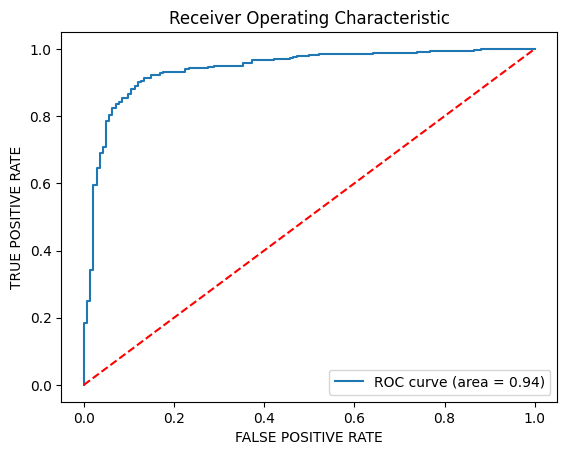

ROC-AUC SCORE :  94.0


In [ ]:
# getting probability

y_pred = rf_clf.predict(x_val_scaled)

probability = rf_clf.predict_proba(x_val_scaled)
probabilities = probability[:,1]


# Compute the false positive rate, true positive rate, and thresholds
fpr,tpr,threshold = roc_curve(y_val,probabilities)

# compute area under the curve
roc_auc = auc(fpr, tpr)

#plot the ROC curve
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0, 1], '--', color='red')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



print('ROC-AUC SCORE : ',round(roc_auc_score(y_val,probabilities)*100,2))

### PRECISION RECALL CURVE


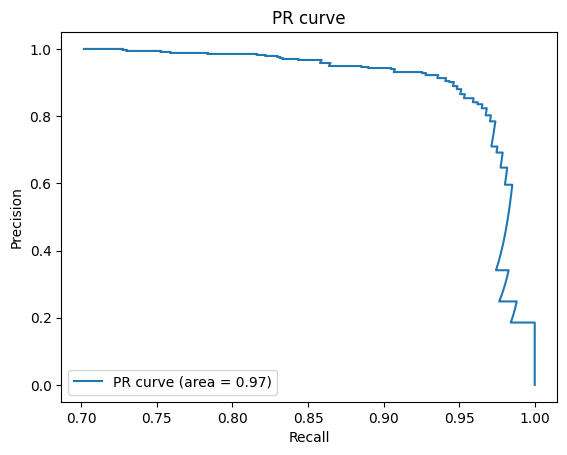

PR SCORE :  0.97


In [ ]:
# Compute the false precision and recall at all thresholds
precision, recall, threshold = precision_recall_curve(y_val, probabilities)

# Area under Precision Recall Curve
auprc = average_precision_score(y_val, probabilities)

# Plot the precision-recall curve
plt.plot(precision,recall, label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.legend(loc="lower left")
plt.show()


print('PR SCORE : ',round(auprc,2))

### FEATURE IMPORTANCE:

<Axes: >

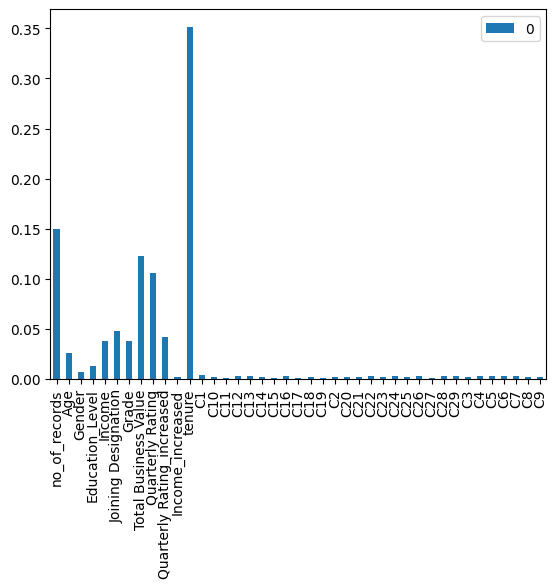

In [ ]:
pd.DataFrame(data=rf_clf.feature_importances_,
            index=x_sm.columns).plot(kind="bar")


### INFERENCE:

This model based on random forest(bagging) can,

  1. Detect **94%** (precision) of data which is truly positive out of total **detected** positives

  2. Detect **90%** (recall) of data which is truly positive out of all the total **actual** positvies

  3. **F1** sccore is the trade off between precision and recall scores and it comes out to be **92%** although **accuracy** is **89%**
   
  4. **ROC** curve area is **94%** and **PR** curve area is **97%**

  5. **Tenure** is the most important feature and then comes the no_of_records

## BOOSTING ENSEMBLE :

## GRADIENT BOOST

In [ ]:
params = {
          'n_estimators' : [50,100,200],
          'max_depth' : [5,7,10],
          'max_features' : [7,8,10],
          'subsample' : [0.5,0.75,0.9]
          }

start_time = time.time()

grid = GridSearchCV(estimator = GradientBoostingClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

grid.fit(x_sm,y_sm)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

elapsed_time = time.time() - start_time
print("\n Elapsed Time: ", elapsed_time)


Best params:  {'max_depth': 5, 'max_features': 10, 'n_estimators': 200, 'subsample': 0.5}
Best score:  0.9366585047178039

 Elapsed Time:  119.91562509536743


In [ ]:
gbc = GradientBoostingClassifier(random_state=7, max_depth=10, max_features=10, n_estimators=200,subsample=0.9)


cv_acc_results = cross_validate(gbc, x_sm, y_sm, cv=10, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n\
Train: {cv_acc_results['train_score'].mean()*100:.2f}\n\
Validation: {cv_acc_results['test_score'].mean()*100:.2f}")

K-Fold Accuracy Mean: 
Train: 100.00
Validation: 93.87


In [ ]:
#gbc = GradientBoostingClassifier(max_depth=10,max_features=10,n_estimators=200,subsample=0.75)
gbc.fit(x_sm, y_sm)

GradientBoostingClassifier(max_depth=10, max_features=10, n_estimators=200,
                           random_state=7, subsample=0.9)

In [ ]:
print('TRAINING ACCURACY : ',gbc.score(x_sm,y_sm))
print('VALIDATION ACCURACY : ',gbc.score(x_val_scaled,y_val))

TRAINING ACCURACY :  1.0
VALIDATION ACCURACY :  0.9054621848739496


### CLASSIFICATION METRICS


In [ ]:
y_val_pred = gbc.predict(x_val_scaled)
print('VALIDATION DATA:')
print('Precision Score:',precision_score(y_val,y_val_pred).round(2))
print('Recall Score:',recall_score(y_val,y_val_pred).round(2))
print('F1 Score:',f1_score(y_val,y_val_pred).round(2))


VALIDATION DATA:
Precision Score: 0.95
Recall Score: 0.91
F1 Score: 0.93


In [ ]:
print(classification_report(y_val,y_val_pred))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       142
           1       0.95      0.91      0.93       334

    accuracy                           0.91       476
   macro avg       0.88      0.90      0.89       476
weighted avg       0.91      0.91      0.91       476



### CONFUSION MATRIX


In [ ]:
cm = confusion_matrix(y_val, y_val_pred)

cm

array([[126,  16],
       [ 29, 305]])

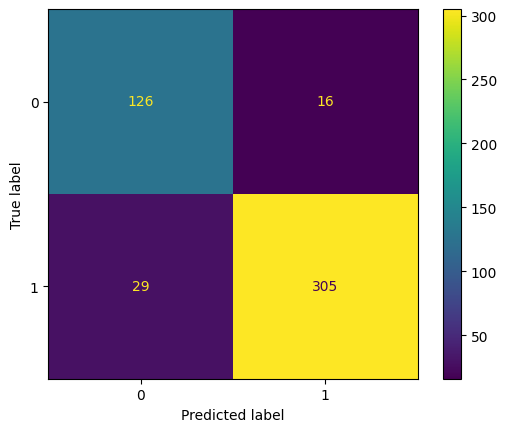

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc.classes_).plot()


### ROC AUC CURVES:


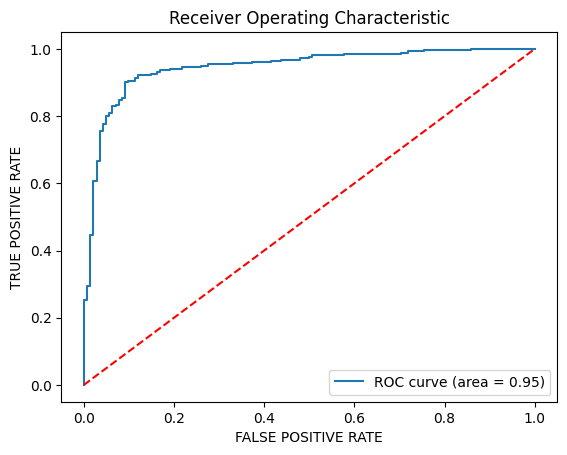

ROC-AUC SCORE :  94.51


In [ ]:
# getting probability

y_pred = gbc.predict(x_val_scaled)

probability = gbc.predict_proba(x_val_scaled)
probabilities = probability[:,1]


# Compute the false positive rate, true positive rate, and thresholds
fpr,tpr,threshold = roc_curve(y_val,probabilities)

# compute area under the curve
roc_auc = auc(fpr, tpr)

#plot the ROC curve
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0, 1], '--', color='red')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



print('ROC-AUC SCORE : ',round(roc_auc_score(y_val,probabilities)*100,2))

### PRECISION RECALL CURVE


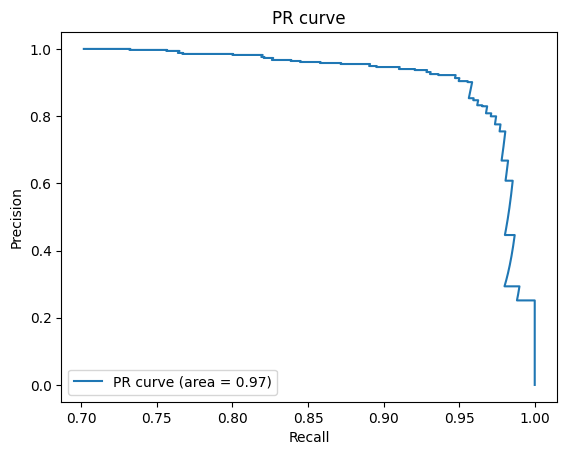

PR SCORE :  0.97


In [ ]:
# Compute the false precision and recall at all thresholds
precision, recall, threshold = precision_recall_curve(y_val, probabilities)

# Area under Precision Recall Curve
auprc = average_precision_score(y_val, probabilities)

# Plot the precision-recall curve
plt.plot(precision,recall, label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.legend(loc="lower left")
plt.show()


print('PR SCORE : ',round(auprc,2))

### FEATURE IMPORTANCE:

<Axes: >

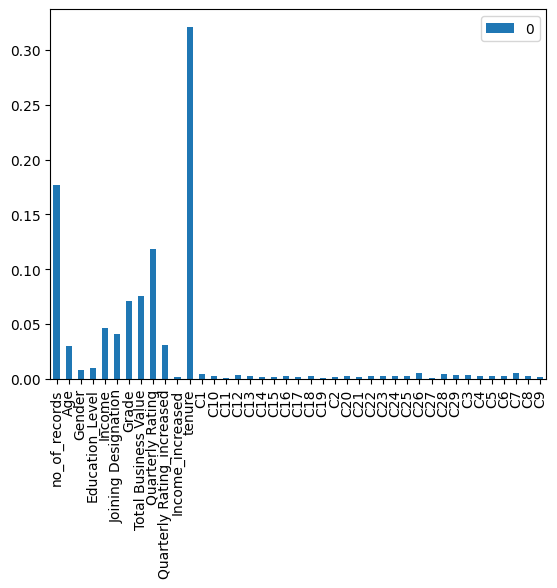

In [ ]:
pd.DataFrame(data=gbc.feature_importances_,
            index=x_sm.columns).plot(kind="bar")


### INFERENCE:

This model based on gradient boosting can,

  1. Detect **95%** (precision) of data which is truly positive out of total **detected** positives

  2. Detect **91%** (recall) of data which is truly positive out of all the total **actual** positvies

  3. **F1** sccore is the trade off between precision and recall scores and it comes out to be **93%** although **accuracy** is **91%**
   
  4. **ROC** curve area is **94.51%** and **PR** curve area is **97%**

  5. **Tenure** is the most important feature and then comes the no_of_records

## XGBOOST:

In [ ]:
params = {
          'n_estimators':[50,100,150,200],
          'max_depth':[5,7,9,10],
          'learning_rate':[0.1,0.2,0.3],
          'subsample':[0.6,0.8,1.0],
          'colsample_bytree':[0.6,0.8,1.0]
          }

xgb = XGBClassifier(objective='multi:softmax',num_class=20)

random_search = RandomizedSearchCV(xgb,
                                   param_distributions = params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=0)

start = time.time()

random_search.fit(x_sm,y_sm)

end = time.time()

print("Best params: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

elapsed_time = end - start
print("\n Elapsed Time: ", elapsed_time)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:10:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Best params:  {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best score:  0.9361302818176135

 Elapsed Time:  40.29552602767944


In [ ]:
xgb = XGBClassifier(objective='multi:softmax',num_class=20,
                    random_state=7, max_depth=9, n_estimators=150,
                    subsample=1.0,learning_rate=0.1,colsample_bytree=0.6)


cv_acc_results = cross_validate(xgb, x_sm, y_sm, cv=10, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n\
Train: {cv_acc_results['train_score'].mean()*100:.2f}\n\
Validation: {cv_acc_results['test_score'].mean()*100:.2f}")

K-Fold Accuracy Mean: 
Train: 100.00
Validation: 94.55


In [ ]:
xgb.fit(x_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None, num_class=20,
              num_parallel_tree=None, ...)

In [ ]:
print('TRAINING ACCURACY : ',xgb.score(x_sm,y_sm))
print('VALIDATION ACCURACY : ', xgb.score(x_val_scaled,y_val))

TRAINING ACCURACY :  1.0
VALIDATION ACCURACY :  0.907563025210084


### CLASSIFICATION METRICS


In [ ]:
y_val_pred = xgb.predict(x_val_scaled)
print('VALIDATION DATA:')
print('Precision Score:',precision_score(y_val,y_val_pred).round(2))
print('Recall Score:',recall_score(y_val,y_val_pred).round(2))
print('F1 Score:',f1_score(y_val,y_val_pred).round(2))


VALIDATION DATA:
Precision Score: 0.95
Recall Score: 0.91
F1 Score: 0.93


In [ ]:
print(classification_report(y_val,y_val_pred))


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       142
           1       0.95      0.91      0.93       334

    accuracy                           0.91       476
   macro avg       0.88      0.90      0.89       476
weighted avg       0.91      0.91      0.91       476



### CONFUSION MATRIX


In [ ]:
cm = confusion_matrix(y_val, y_val_pred)

cm

array([[127,  15],
       [ 29, 305]])

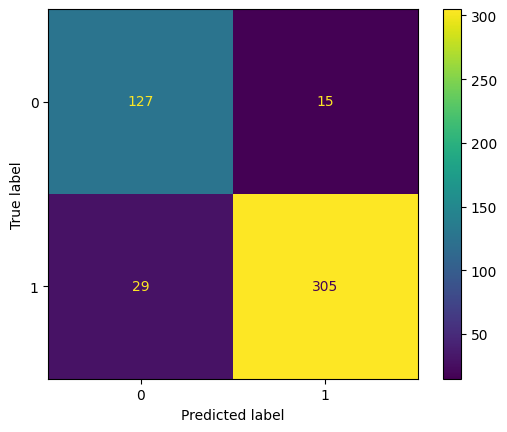

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_).plot()


### ROC AUC CURVES:


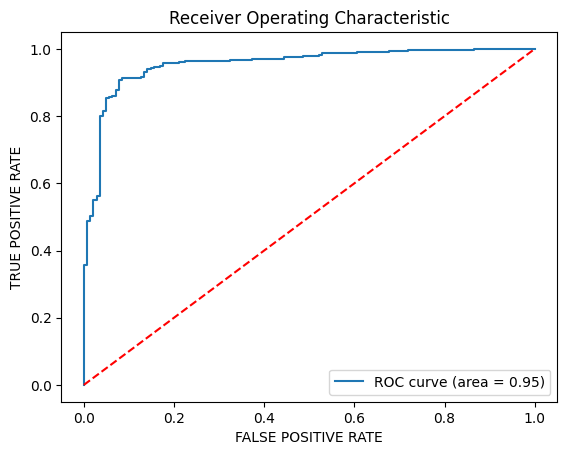

ROC-AUC SCORE :  95.47


In [ ]:
# getting probability

y_pred = xgb.predict(x_val_scaled)

probability = xgb.predict_proba(x_val_scaled)
probabilities = probability[:,1]


# Compute the false positive rate, true positive rate, and thresholds
fpr,tpr,threshold = roc_curve(y_val,probabilities)

# compute area under the curve
roc_auc = auc(fpr, tpr)

#plot the ROC curve
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0, 1], '--', color='red')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



print('ROC-AUC SCORE : ',round(roc_auc_score(y_val,probabilities)*100,2))

### PRECISION RECALL CURVE


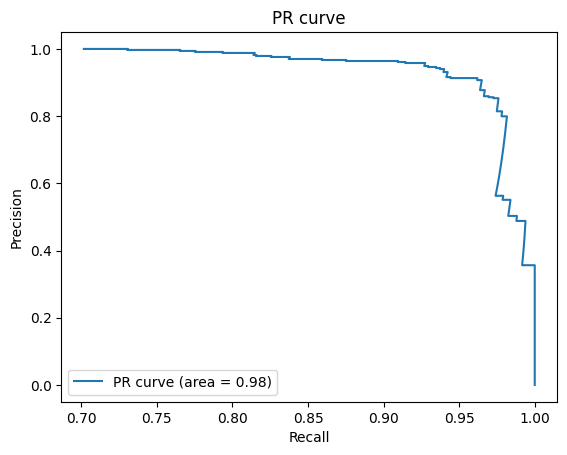

PR SCORE :  0.98


In [ ]:
# Compute the false precision and recall at all thresholds
precision, recall, threshold = precision_recall_curve(y_val, probabilities)

# Area under Precision Recall Curve
auprc = average_precision_score(y_val, probabilities)

# Plot the precision-recall curve
plt.plot(precision,recall, label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.legend(loc="lower left")
plt.show()


print('PR SCORE : ',round(auprc,2))

### FEATURE IMPORTANCE:

<Axes: >

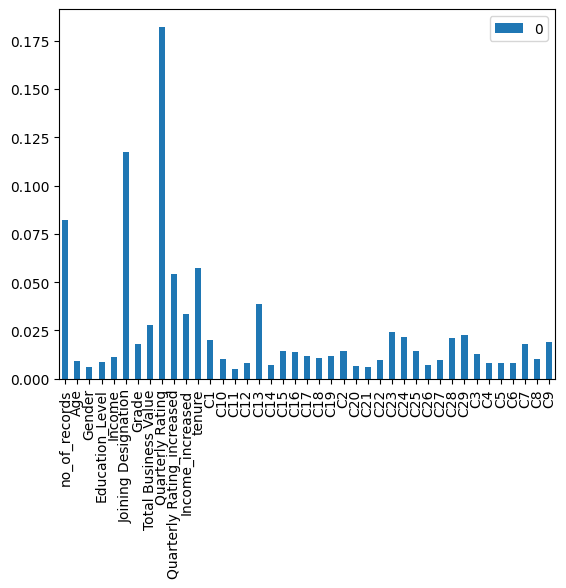

In [ ]:
pd.DataFrame(data=xgb.feature_importances_,
            index=x_sm.columns).plot(kind="bar")


### INFERENCE:

This model based on xgboosting can,

  1. Detect **95%** (precision) of data which is truly positive out of total **detected** positives

  2. Detect **91%** (recall) of data which is truly positive out of all the total **actual** positvies

  3. **F1** sccore is the trade off between precision and recall scores and it comes out to be **93%** although the **accuracy** is **91%**
   
  4. **ROC** curve area is **95.47%** and **PR** curve area is **98%**

  5. **Tenure** is the most important feature and then comes the joining designation

## LIGHTGBM

In [ ]:
params = {
          'learning_rate':[0.1,0.2,0.3],
          'boosting_type':['gbdt'],
          #'objective':['multiclass'],
          'max_depth':[5,6,7,8],
          'subsample':[0.6,0.8,1.0],
          'colsample_bytree':[0.6,0.8,1.0]
          }

lgb_clf = lgb.LGBMClassifier()

random_search = RandomizedSearchCV(lgb_clf,
                                   param_distributions = params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=0)

start = time.time()

random_search.fit(x_sm,y_sm)

end = time.time()

print("Best params: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

elapsed_time = end - start
print("\n Elapsed Time: ", elapsed_time)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 955, number of negative: 955
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2078
[LightGBM] [Info] Number of data points in the train set: 1910, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [ ]:
lgb_clf = random_search.best_estimator_

cv_acc_results = cross_validate(lgb_clf, x_sm, y_sm, cv=10, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n\
Train: {cv_acc_results['train_score'].mean()*100:.2f}\n\
Validation: {cv_acc_results['test_score'].mean()*100:.2f}")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 860, number of negative: 859
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2074
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500291 -> initscore=0.001163
[LightGBM] [Info] Start training from score 0.001163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [ ]:
lgb_clf.fit(x_sm,y_sm)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 955, number of negative: 955
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2078
[LightGBM] [Info] Number of data points in the train set: 1910, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(colsample_bytree=0.6, learning_rate=0.3, max_depth=6)

In [ ]:
print('TRAINING ACCURACY : ',lgb_clf.score(x_sm,y_sm))
print('VALIDATION ACCURACY : ', lgb_clf.score(x_val_scaled,y_val))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
TRAINING ACCURACY :  1.0
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
VALIDATION ACCURACY :  0.9180672268907563


### CLASSIFICATION METRICS


In [ ]:
y_val_pred = lgb_clf.predict(x_val_scaled)
print('VALIDATION DATA:')
print('Precision Score:',precision_score(y_val,y_val_pred).round(2))
print('Recall Score:',recall_score(y_val,y_val_pred).round(2))
print('F1 Score:',f1_score(y_val,y_val_pred).round(2))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
VALIDATION DATA:
Precision Score: 0.96
Recall Score: 0.92
F1 Score: 0.94


In [ ]:
print(classification_report(y_val,y_val_pred))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87       142
           1       0.96      0.92      0.94       334

    accuracy                           0.92       476
   macro avg       0.90      0.92      0.90       476
weighted avg       0.92      0.92      0.92       476



### CONFUSION MATRIX


In [ ]:
cm = confusion_matrix(y_val, y_val_pred)

cm

array([[129,  13],
       [ 26, 308]])

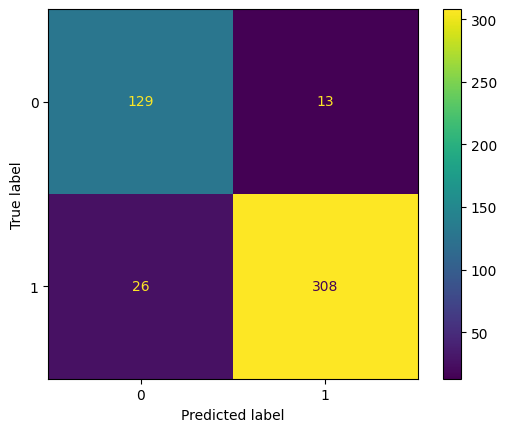

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgb_clf.classes_).plot()


### ROC AUC CURVES:


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


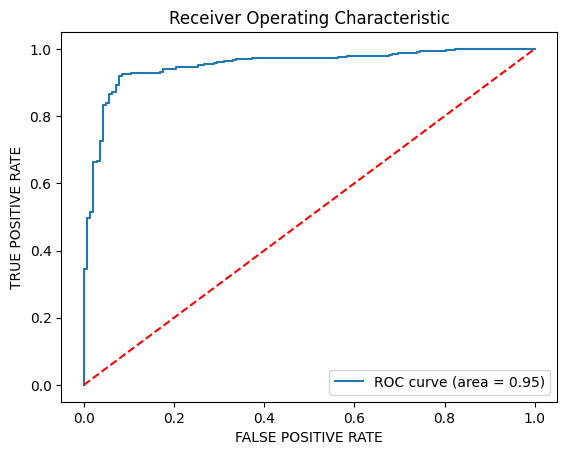

ROC-AUC SCORE :  95.19


In [ ]:
# getting probability

y_pred = lgb_clf.predict(x_val_scaled)

probability = lgb_clf.predict_proba(x_val_scaled)
probabilities = probability[:,1]


# Compute the false positive rate, true positive rate, and thresholds
fpr,tpr,threshold = roc_curve(y_val,probabilities)

# compute area under the curve
roc_auc = auc(fpr, tpr)

#plot the ROC curve
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0, 1], '--', color='red')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



print('ROC-AUC SCORE : ',round(roc_auc_score(y_val,probabilities)*100,2))

### PRECISION RECALL CURVE


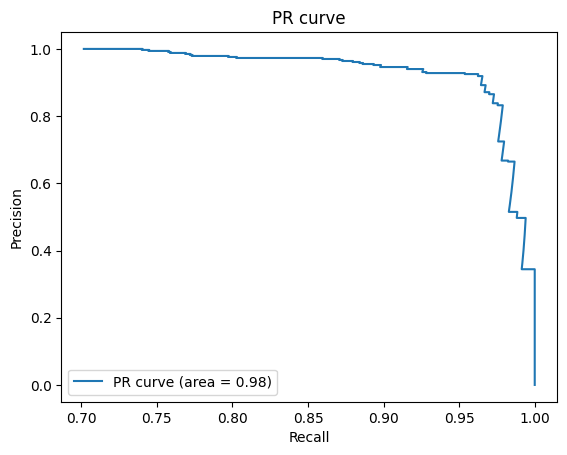

PR SCORE :  0.98


In [ ]:
# Compute the false precision and recall at all thresholds
precision, recall, threshold = precision_recall_curve(y_val, probabilities)

# Area under Precision Recall Curve
auprc = average_precision_score(y_val, probabilities)

# Plot the precision-recall curve
plt.plot(precision,recall, label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.legend(loc="lower left")
plt.show()


print('PR SCORE : ',round(auprc,2))

### FEATURE IMPORTANCE:


<Axes: >

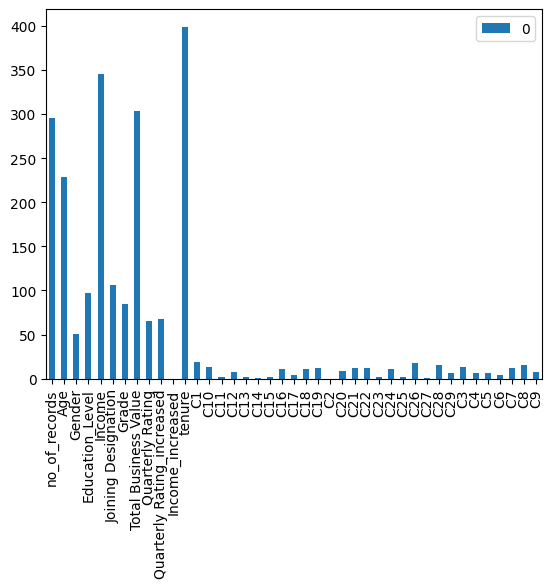

In [ ]:
pd.DataFrame(data=lgb_clf.feature_importances_,
            index=x_sm.columns).plot(kind="bar")


### INFERENCE:

This model based on light gbm boosting can,

  1. Detect **96%** (precision) of data which is truly positive out of total **detected** positives

  2. Detect **92%** (recall) of data which is truly positive out of all the total **actual** positvies

  3. **F1** sccore is the trade off between precision and recall scores and it comes out to be **94%** although the **accuracy** is **92%**
   
  4. **ROC** curve area is **95.19%** and **PR** curve area is **98%**

  5. **Tenure** is the most important feature and then comes the income and total business value

## COMPARING MODELS:


### 1. RANDOM FOREST:

       1. Precision Score: 0.94
       2. Recall Score: 0.9
       3. F1 Score: 0.92
       4. ROC-AUC SCORE : 0.94
       5. PR SCORE :  0.97


### 2. GRADIENT BOOST:

       1. Precision Score: 0.95
       2. Recall Score: 0.91
       3. F1 Score: 0.93
       4. ROC-AUC SCORE : 0.94
       5. PR SCORE :  0.97

### 3. XGBOOST:

       1. Precision Score: 0.95
       2. Recall Score: 0.91
       3. F1 Score: 0.93
       4. ROC-AUC SCORE : 0.95
       5. PR SCORE :  0.98

### 4. LIGHTGBM:

       1. Precision Score: 0.96
       2. Recall Score: 0.92
       3. F1 Score: 0.94
       4. ROC-AUC SCORE : 0.9556
       5. PR SCORE :  0.98


### INFERENCE:

Comparing the different models we can say that all the model's performance is almost the **same**.

But still **LIGHTGBM** model is **0.1%** better than other models so we choose the lightgbm model as our final model

## FINAL MODEL IMPLEMENTATION FOR TEST DATA


In [ ]:
lgb_clf.fit(x_sm,y_sm)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 955, number of negative: 955
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2078
[LightGBM] [Info] Number of data points in the train set: 1910, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier(colsample_bytree=0.6, learning_rate=0.3, max_depth=6)

In [ ]:
y_pred = lgb_clf.predict(x_test_scaled)


print('TEST DATA:')
print('--------------')
print('ACCURACY : ',lgb_clf.score(x_test_scaled,y_test).round(2))
print('PRECISION_SCORE : ',precision_score(y_test,y_pred).round(2))
print('RECALL_SCORE : ',recall_score(y_test,y_pred).round(2))
print('F1_SCORE : ',f1_score(y_test,y_pred).round(2))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
TEST DATA:
--------------
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
ACCURACY :  0.93
PRECISION_SCORE :  0.94
RECALL_SCORE :  0.96
F1_SCORE :  0.95


In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.87      0.89       150
           1       0.94      0.96      0.95       327

    accuracy                           0.93       477
   macro avg       0.93      0.92      0.92       477
weighted avg       0.93      0.93      0.93       477



### CONFUSION MATRIX:

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[131,  19],
       [ 13, 314]])

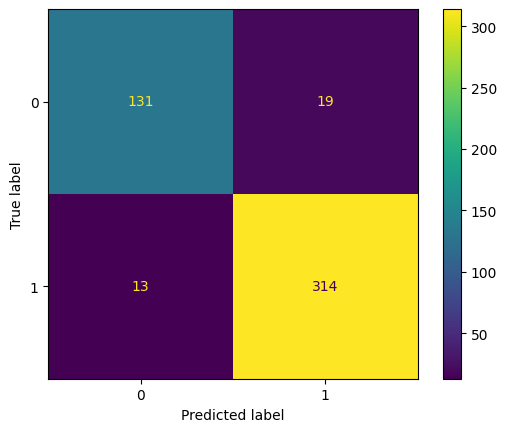

In [ ]:
ConfusionMatrixDisplay(cm).plot();


### ROC AUC CURVES:


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


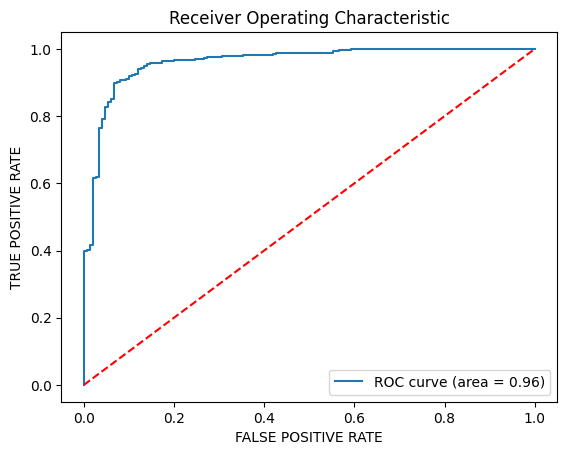

ROC-AUC SCORE :  96.13


In [ ]:
# getting probability

y_pred = lgb_clf.predict(x_test_scaled)

probability = gbc.predict_proba(x_test_scaled)
probabilities = probability[:,1]


# Compute the false positive rate, true positive rate, and thresholds
fpr,tpr,threshold = roc_curve(y_test,probabilities)

# compute area under the curve
roc_auc = auc(fpr, tpr)

#plot the ROC curve
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0, 1], '--', color='red')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



print('ROC-AUC SCORE : ',round(roc_auc_score(y_test,probabilities)*100,2))

### PRECISION RECALL CURVE


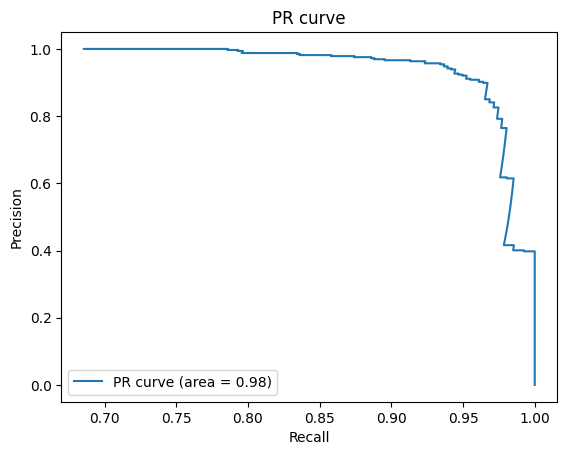

PR SCORE :  0.98


In [ ]:
# Compute the false precision and recall at all thresholds
precision, recall, threshold = precision_recall_curve(y_test, probabilities)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probabilities)

# Plot the precision-recall curve
plt.plot(precision,recall, label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.legend(loc="lower left")
plt.show()


print('PR SCORE : ',round(auprc,2))

### FEATURE IMPORTANCE


<Axes: >

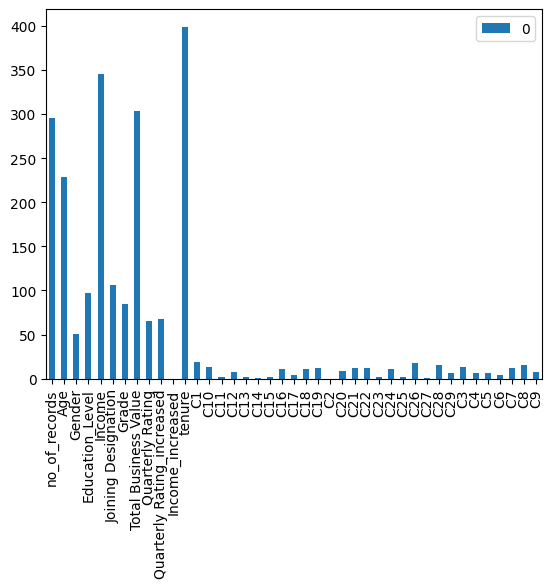

In [ ]:
pd.DataFrame(data=lgb_clf.feature_importances_,
            index=x_sm.columns).plot(kind="bar")


### INFERENCE:

This model based on light gbm boosting can,

  1. Detect **94%** (precision) of data which is truly positive out of total **detected** positives

  2. Detect **96%** (recall) of data which is truly positive out of all the total **actual** positvies

  3. **F1** sccore is the trade off between precision and recall scores and it comes out to be **95%** although the **accuracy** is **93%**
   
  4. **ROC** curve area is **96.13%** and **PR** curve area is **98%**

  5. **Tenure** is the most important feature and then comes the income and total business value

In [ ]:
agg_df['LastWorkingDate'].value_counts()

1    1616
0     765
Name: LastWorkingDate, dtype: int64

## INSIGHTS:

1. Out of 2381 drivers, 1616 has left the company

2. Most drivers are of the age **32 years** and only one driver is 58 years old.
Also most drivers fall under the age group of **31 to 41 years**

3. Most drivers are from city **C20** whereas least are from C11

4. There are **59% male** and **41% female** drivers

5. The distribution of drivers on the basis of education level is almost the same for all categories

6. Majority of the drivers join the company in **designation 1**

7. Majority drivers fall under **grade 2** with the minority being grade 5

8. Most drivers had **no raise** in their Quarterly **rating** which is poor

9. **98%** of the drivers **didnt** get any **hike** in their salary for 2 years

10. The columns Gender and Education level has no effect on the employee churn rate

11. Joining Designation, Grade, Age, City - columns has a little impact on the churn rate

12. Churn rate is **greatly influenced** by **Quarterly rating improvement**, **increased income** and **tenure**

## RECOMMENDATIONS:

1. We need to **incentivise** the drivers overtime or other perks to overcome churning.

2. The employees whose quarterly rating has not increased are less likely to leave the organization.

3. Out of 2381 employees, the quarterly rating has not increased for 2076 employees. This is red flag for the company which needs to regulate.

4. Company needs to look why customers are not rating drivers.Company needs to implement the reward system for the customer who provide the feedback and rate drivers based on which the employee rating will also be improved.

5. The employees whose monthly salary has not increased are more likely to leave the organization.
Company needs to get in touch with those drivers whose monthly salary has not increased and help them out to earn more by provider bonus and perks.

6.  **Tenure** is the most important feature and then comes the income,total business value, no_of_records and age. These are to be treated as predicators and the company should check on this every now and then.